## Ecommerce company product analysis

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('EC_product.csv')
df.head(2)

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...


In [4]:
df.shape

(12041, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [6]:
df.describe()

,product_rating,seller_rating
count,11961.000000,11827.000000
mean,4.061617,4.394538
std,0.345575,0.404288
min,1.000000,3.000000
25%,3.900000,4.100000
50%,4.100000,4.400000
75%,4.300000,4.700000
max,5.000000,5.000000


In [7]:
df.dtypes

category_1         object
category_2         object
category_3         object
title              object
product_rating    float64
selling_price      object
mrp                object
seller_name        object
seller_rating     float64
description        object
highlights         object
image_links        object
dtype: object

# Dropping unnecesarry column

In [8]:
df.drop(['image_links','description','highlights'],axis=1, inplace=True)

In [9]:
df.shape

(12041, 9)

In [10]:
df.isnull().sum()                           #checking null values

category_1          0
category_2          0
category_3          0
title              18
product_rating     80
selling_price      28
mrp               375
seller_name       216
seller_rating     214
dtype: int64

# Null value treatment
## Title

In [11]:
df[df['title'].isnull()].head()

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,NaN,NaN,NaN,NaN,NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,NaN,NaN,NaN,NaN,NaN,NaN
1578,"Sports, Books and More",Industrial &Scientific tools,Packaging and Shipping Products,NaN,NaN,NaN,NaN,NaN,NaN
1936,Electronics,Mobile Accessories,Screenguards,NaN,NaN,NaN,NaN,NaN,NaN
2164,Electronics,Smart Wearable Tech,Smart Watches,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['title'].fillna('other',inplace=True)         #filling null values of title.

In [13]:
df.title.isnull().sum()

0

## Product rating

In [14]:
df[df.product_rating.isnull()].head()

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,other,NaN,NaN,NaN,NaN,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,other,NaN,NaN,NaN,NaN,NaN
721,"Sports, Books and More",Food Essentials,Gifting Combos,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN
1438,"Sports, Books and More",Industrial &Scientific tools,Industrial Measurement Devices,DTTOOLS 25~50mm Micrometer Outside Screw Gauge...,NaN,₹889,"₹1,099",NaN,NaN


In [15]:
df.product_rating.isnull().sum()

80

In [16]:
df.product_rating.unique()

array([4.4, 3.7, 3.8, 3.4, 3.5, 4.1, 4. , 3.9, 4.3, 4.8, 3.6, 3.3, 4.2,
       4.9, 4.5, 1. , 4.6, 5. , 2.6, 3. , 2.8, nan, 4.7, 3.2, 2.9, 2.7,
       2.3, 3.1, 2.4, 2. , 2.5, 2.1, 2.2, 1.4])

In [17]:
mode=df.product_rating.mode()
mode

0    4.0
dtype: float64

In [18]:
df['product_rating'].fillna(4.0,inplace=True)

In [19]:
df.product_rating.isnull().sum()

0

## Sellling_price

In [20]:
df.selling_price

0        ₹1,615
1          ₹152
2           ₹59
3           ₹75
4          ₹329
          ...  
12036      ₹380
12037      ₹179
12038      ₹354
12039      ₹498
12040      ₹239
Name: selling_price, Length: 12041, dtype: object

In [21]:
df['selling_price'].isnull().sum()

28

In [22]:
df.selling_price.mode()

0    ₹299
dtype: object

In [23]:
df['selling_price'].fillna('₹299', inplace=True)

In [24]:
df.selling_price.isnull().sum()

0

## MRP

In [25]:
df.mrp

0        ₹4,000
1          ₹600
2          ₹199
3          ₹299
4        ₹1,399
          ...  
12036      ₹999
12037      ₹299
12038      ₹600
12039      ₹599
12040      ₹399
Name: mrp, Length: 12041, dtype: object

In [26]:
df.mrp.isnull().sum()

375

In [27]:
df.mrp.dtype

dtype('O')

In [28]:
df['mrp'].mode()

0    ₹999
dtype: object

In [29]:
df['mrp'].fillna('₹999', inplace=True)

In [30]:
df.mrp.isnull().sum()

0

## Seller_name

In [31]:
df.seller_name.isnull().sum()

216

In [32]:
df.seller_name.mode()

0    RetailNet
dtype: object

In [33]:
df.seller_name.fillna('RetailNet',inplace=True)

## seller_rating

In [34]:
df[df['seller_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating
40,"Sports, Books and More",Sports,Badminton,VICTOO SPORTS VICTOO PROFESIONAL BADMINTON Bad...,3.8,₹335,₹600,RetailNet,NaN
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,other,4.0,₹299,₹999,RetailNet,NaN
600,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,OPEN SECRET Snacks Combo | Nutty Cookies and N...,2.7,₹455,₹999,RetailNet,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,4.0,"₹2,710","₹4,476",RetailNet,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,other,4.0,₹299,₹999,RetailNet,NaN
...,...,...,...,...,...,...,...,...,...
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",4.0,"₹2,999","₹5,000",RetailNet,NaN
11817,Home and Furniture,Home Lighting,Ceiling Lamp,other,4.0,₹299,₹999,RetailNet,NaN
11882,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,SHANKAR PERFUMEERY WORKS Combo Pack - Aromatic...,4.1,₹275,₹999,RetailNet,NaN
11904,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,UNIBIC Season's Greetings|Christmas & New Year...,3.6,₹599,₹999,RetailNet,NaN


In [35]:
df.seller_rating.unique()

array([4.4, 4.7, 4.1, 4.8, 4.5, 4.3, nan, 4.9, 4.6, 5. , 3.5, 4.2, 4. ,
       3.6, 3.9, 3. , 3.7, 3.4, 3.8, 3.2, 3.1, 3.3])

In [36]:
df.seller_rating.mode()

0    4.8
dtype: float64

In [37]:
df.seller_rating.fillna(4.8, inplace=True)

## Univariate analysis

In [38]:
df.category_1.value_counts()

Women's wear              2422
Men's wear                2360
Bady and Kids             2338
Home and Furniture        2120
Sports, Books and More    1820
Electronics                981
Name: category_1, dtype: int64

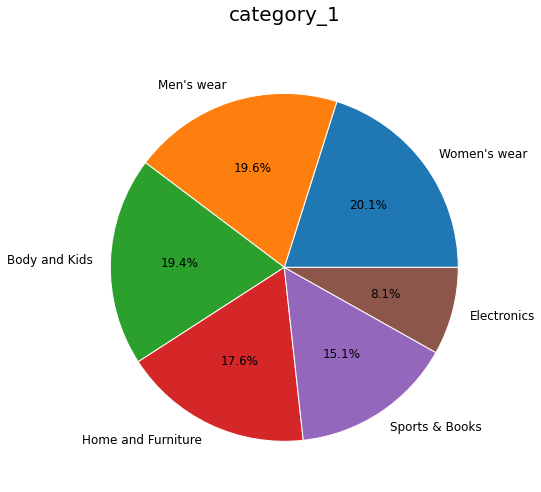

In [39]:
plt.figure(figsize=(8,8))

allLables= ["Women's wear","Men's wear","Body and Kids","Home and Furniture","Sports & Books","Electronics"]

plt.pie(df.category_1.value_counts(),labels=allLables, autopct='%0.1f%%',wedgeprops={'edgecolor':'white'},textprops={'size':12})

plt.title('category_1\n',size=20)
plt.show()

### Observation is that women's Wear is the top from all category with(20.1%), followed by men's wear with(19.6%) and after Boys and Kids with(19.4%)

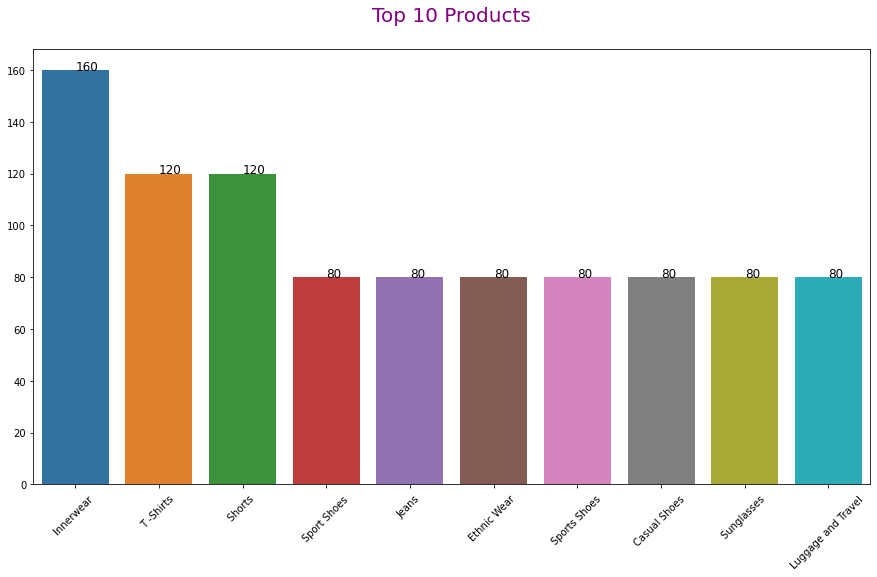

In [40]:
plt.figure(figsize=(15,8))

Value= df.category_3.value_counts()[0:10]

g= sns.barplot(x=Value.index, y=Value.values, data=df, palette='tab10')

for i in range(10):
    val=Value[i]
    g.text(y=val,x=i , s= val, fontsize=12)

plt.title('Top 10 Products\n', color='Purple', size=20)
plt.xticks(rotation=45)
plt.show()

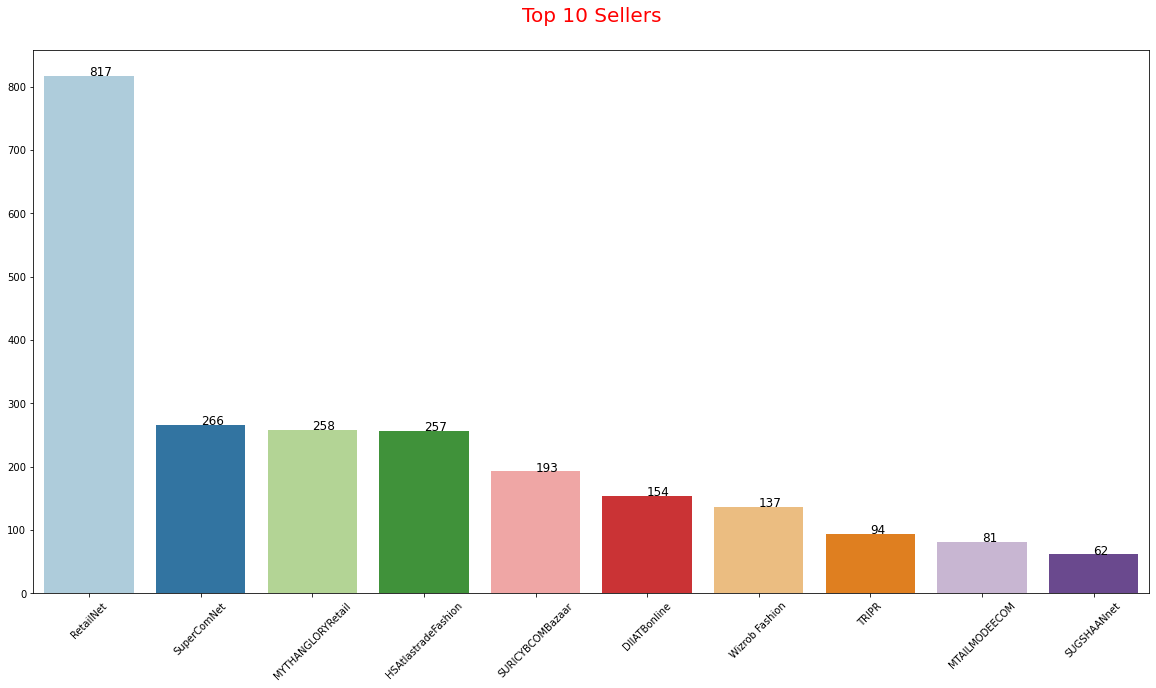

In [41]:
plt.figure(figsize=(20,10))

Value= df.seller_name.value_counts()[0:10]

g= sns.barplot(x=Value.index, y=Value.values, data=df, palette='Paired')

for i in range(10):
    val=Value[i]
    g.text(y=val, x=i , s= val, fontsize=12)

plt.title('Top 10 Sellers\n', color='Red', size=20)
plt.xticks(rotation=45)
plt.show()

### From the barplot we can observe that "RetailNet" is the top seller with 817, after that "SuperComeNet" with 266 and "MYTHANGLORYRetail" with 258 and so on.

In [42]:
df.seller_rating.value_counts().head(10)

4.8    1779
4.7    1382
4.4    1241
4.9    1097
4.3     957
4.6     956
4.1     917
4.2     796
3.9     582
4.0     544
Name: seller_rating, dtype: int64

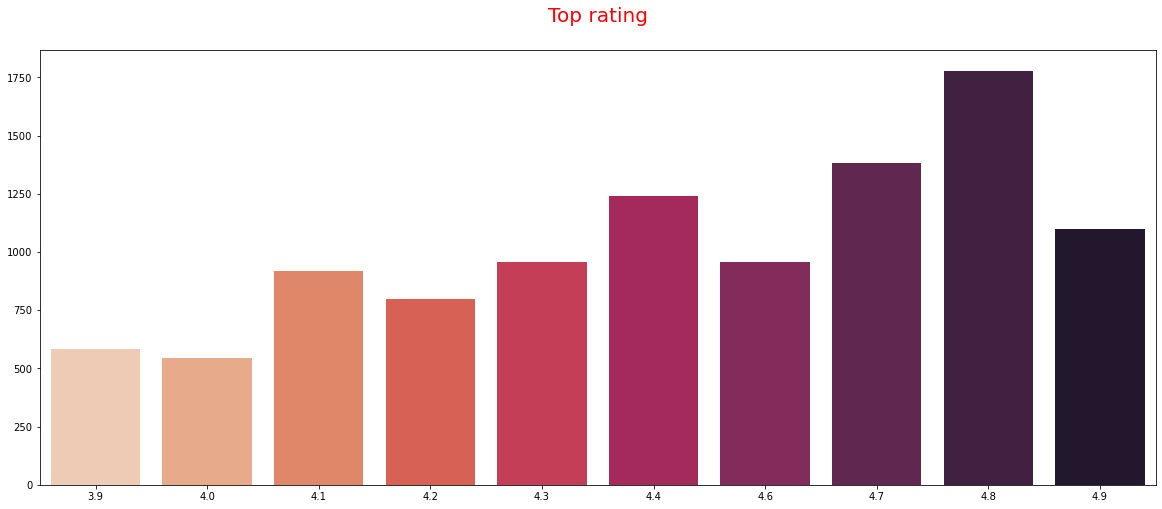

In [43]:
plt.figure(figsize=(20,8))

Value=(df.seller_rating.value_counts().head(10))
g=sns.barplot(x=Value.index, y=Value.values, data=df, palette='rocket_r')
plt.title('Top rating\n', color='Red', size=20)
plt.show()

### Ratings from 4.4 to 4.9 are the most given ratings.


# Bivariate alaysis

In [44]:
df.mrp

0        ₹4,000
1          ₹600
2          ₹199
3          ₹299
4        ₹1,399
          ...  
12036      ₹999
12037      ₹299
12038      ₹600
12039      ₹599
12040      ₹399
Name: mrp, Length: 12041, dtype: object

In [45]:
def remove_char(val):
    return(int(val.replace('₹','').replace(',','')))

In [46]:
df.mrp= df.mrp.map(remove_char)
df.mrp

0        4000
1         600
2         199
3         299
4        1399
         ... 
12036     999
12037     299
12038     600
12039     599
12040     399
Name: mrp, Length: 12041, dtype: int64

In [47]:
df.selling_price= df.selling_price.map(remove_char)
df.selling_price

0        1615
1         152
2          59
3          75
4         329
         ... 
12036     380
12037     179
12038     354
12039     498
12040     239
Name: selling_price, Length: 12041, dtype: int64

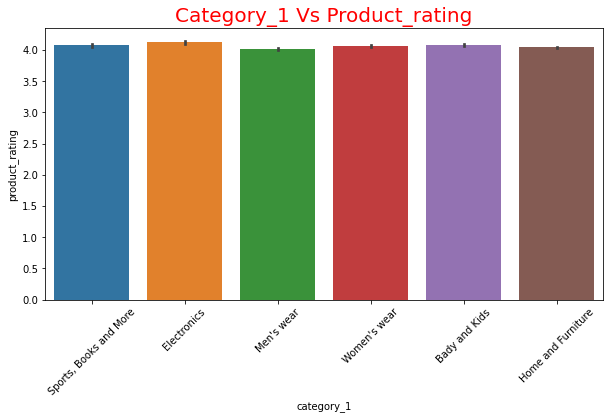

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x='category_1',y='product_rating',data= df)
plt.title('Category_1 Vs Product_rating', color='Red', size=20)
plt.xticks(rotation=45)
plt.show()

In [49]:
selling=df.groupby(['category_3'])['selling_price'].agg(max).sort_values(ascending=False).head(10)
selling

category_3
Gaming Laptops                 300490
Lens                           199690
Desktop PCs                    189990
DSLR and Mirrorless             97995
Coins and Bars                  85360
Industrial Testing Devices      85000
Cardio Equipment                69999
Apple Ipads                     68079
Gaming Consoles                 55990
Gaming and Accessories          54890
Name: selling_price, dtype: int64

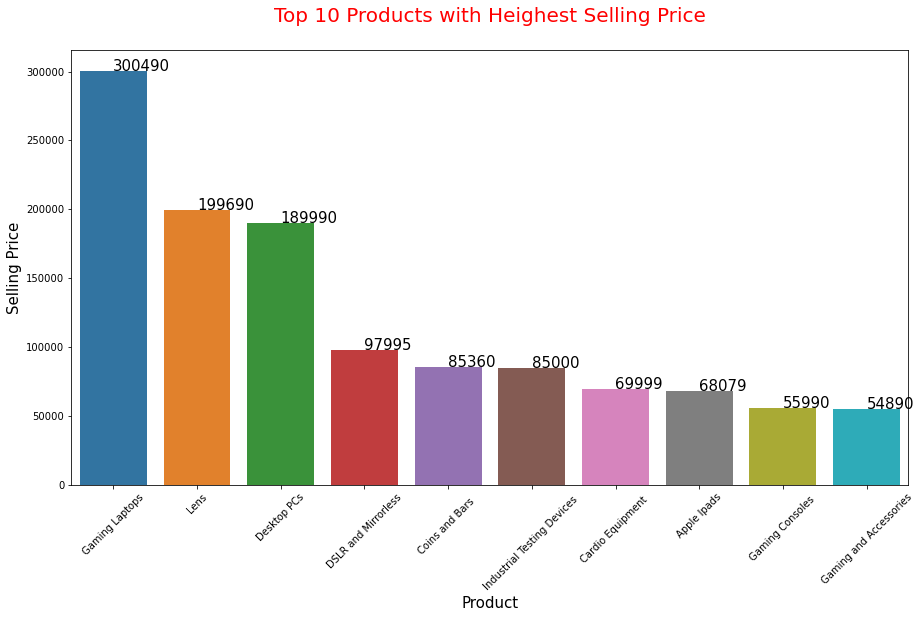

In [50]:
plt.figure(figsize=(15,8))

selling=df.groupby(['category_3'])['selling_price'].agg(max).sort_values(ascending=False).head(10)


G= sns.barplot(x=selling.index,y=selling.values,palette='tab10')
for i in range(10):
    value=selling[i]

    G.text(y=value, x=i , s= value, fontsize=15)

G.set_xlabel('Product',fontsize=15)    
G.set_ylabel('Selling Price',fontsize=15)
G.set_title('Top 10 Products with Heighest Selling Price\n',color='Red',fontsize=20)
plt.xticks(rotation=45)
plt.show()    


### Gaming laptops are the top selling product with highest selling price.

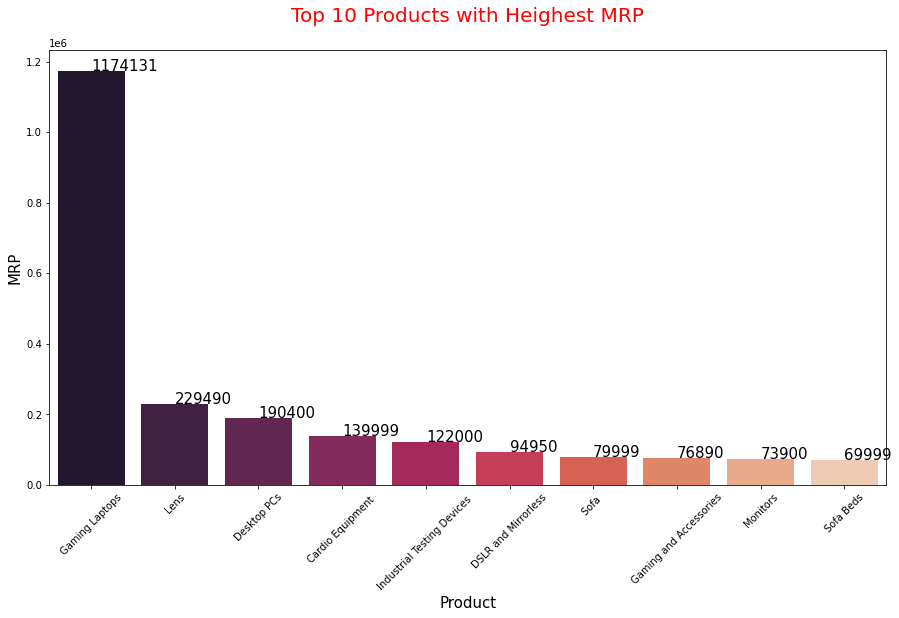

In [51]:
plt.figure(figsize=(15,8))

selling=df.groupby(['category_3'])['mrp'].agg(max).sort_values(ascending=False).head(10)


G= sns.barplot(x=selling.index,y=selling.values,palette='rocket')
for i in range(10):
    value=selling[i]

    G.text(y=value , x=i , s= value, fontsize=15)

G.set_xlabel('Product',fontsize=15)    
G.set_ylabel('MRP',fontsize=15)
G.set_title('Top 10 Products with Heighest MRP\n',color='Red',fontsize=20)
plt.xticks(rotation=45)
plt.show()    

### Gaming laptops are the top selling product with highest MRP.

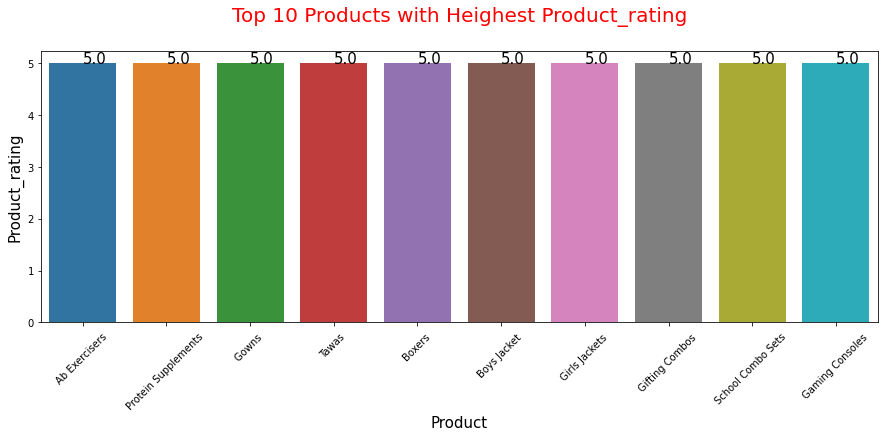

In [52]:
plt.figure(figsize=(15,5))

selling=df.groupby(['category_3'])['product_rating'].agg(max).sort_values(ascending=False).head(10)


G= sns.barplot(x=selling.index,y=selling.values,palette='tab10')
for i in range(10):
    value=selling[i]

    G.text(y=value, x=i , s= value, fontsize=15)

G.set_xlabel('Product',fontsize=15)    
G.set_ylabel('Product_rating',fontsize=15)
G.set_title('Top 10 Products with Heighest Product_rating\n',color='Red',fontsize=20)
plt.xticks(rotation=45)
plt.show()    

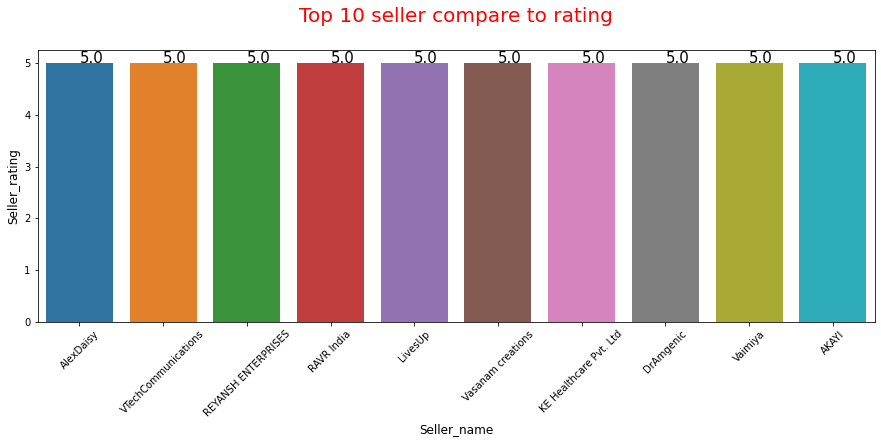

In [53]:
plt.figure(figsize=(15,5))

selling=df.groupby(['seller_name'])['seller_rating'].agg(max).sort_values(ascending=False).head(10)


G= sns.barplot(x=selling.index,y=selling.values,palette='tab10')
for i in range(10):
    value=selling[i]

    G.text(y=value, x=i , s= value, fontsize=15)

G.set_xlabel('Seller_name',fontsize=12)    
G.set_ylabel('Seller_rating',fontsize=12)
G.set_title('Top 10 seller compare to rating\n',color='Red',fontsize=20)
plt.xticks(rotation=45)
plt.show()    